In [1]:
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
%matplotlib inline

Using TensorFlow backend.


In [2]:
K.clear_session()

In [3]:
data_dir = './data'
train_dir =os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
# train_images,train_labels = getImagesFromFolder(train_dir)
# test_images,test_labels = getImagesFromFolder(test_dir)

In [4]:
batch_size = 32
target_size=224
train_datagen = ImageDataGenerator(shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(target_size,target_size),
                        batch_size=batch_size)

Found 43456 images belonging to 38 classes.


In [5]:
images, targets = next(train_generator)

In [6]:
images.shape

(32, 224, 224, 3)

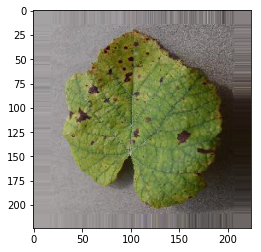

In [7]:
plt.imshow(images[0].astype(int))

In [8]:
targets.shape
target_size

224

In [9]:
targets[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [10]:

base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [16]:
base_model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

AttributeError: 'Model' object has no attribute 'add'